<a href="https://www.kaggle.com/code/hashemi221022/rice-prediction-with-convolutional-neural-network?scriptVersionId=140407557" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<h1><center style="font-family:newtimeroman;font-size:150%; border-radius:50px; padding: 20px; color: yellow; background-color: black"> Rice prediction with convolutional neural network(CNN)</center></h1>
<center><img style="border-radius: 20px 20px 200px 200px" src='https://assets.epicurious.com/photos/5e2783d786660300087b47a7/16:9/w_2560%2Cc_limit/ShopForRice_HERO_V1_011520_097.jpg' height=500px width=900px border-radius=45%></center><br>

<div style="border-radius:50px; padding: 20px; background-color: black; font-size:120%; text-align:left">

<h3 align="left"><font color=yellow>About Data:</font></h3>
    
<p><font color=yellow>Rice, which is among the foremost broadly created grain items around the world, has numerous hereditary assortments. These assortments are isolated from each other due to a few of their highlights. These are more often than not highlights such as surface, shape, and color. With these highlights that recognize rice assortments, it is conceivable to classify and assess the quality of seeds. 

This dataset has pictures of 5 sorts of rice counting: Arborio, Basmati, Ipsala, Jasmine and Karacadag.

The dataset has 75K pictures counting 15K pieces from each rice assortment. By building a model for this dataset, we will utilize it to classify rice sorts.</font></p>

 <center><button type="button"><a href="https://www.muratkoklu.com/datasets/">Rice Data</a></button><center



In [1]:
pip install split_folders

Note: you may need to restart the kernel to use updated packages.


In [2]:
# remove warnings
import warnings
warnings.filterwarnings('ignore')

# <p style="background-color:black; font-family:calibri; color:yellow; font-size:170%; text-align:center; border-radius:30px 30px;">1. The First Step | Import library</p>

In [3]:
import splitfolders
import itertools
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report

# <p style="background-color:black; font-family:calibri; color:yellow; font-size:170%; text-align:center; border-radius:30px 30px;">2. The Second Step | preparing Dataset</p>

In [4]:
Data ="/kaggle/input/rice-image-dataset/Rice_Image_Dataset"


In [5]:
# splite dataset to 3 class of train, validation and test
splitfolders.ratio(Data, output='Rice_Image_Train_Validation_Test', seed=42, ratio=(.7, .2, .1), group_prefix=None)

Copying files: 75000 files [11:06, 112.49 files/s]


In [6]:
# read train, validation and test in dataset
BATCH_SIZE = 20

IMAGE_SIZE = (160, 160)

Train = keras.utils.image_dataset_from_directory(
    
    directory = '/kaggle/working/Rice_Image_Train_Validation_Test/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = BATCH_SIZE,
    image_size = IMAGE_SIZE,
    seed = 42,
)

Validation = keras.utils.image_dataset_from_directory(
    directory = '/kaggle/working/Rice_Image_Train_Validation_Test/val',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = BATCH_SIZE,
    image_size = IMAGE_SIZE,
    seed = 42,
)

Test = keras.utils.image_dataset_from_directory(
    directory = '/kaggle/working/Rice_Image_Train_Validation_Test/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = BATCH_SIZE,
    image_size = IMAGE_SIZE,
    seed = 42,
)

Found 52500 files belonging to 5 classes.
Found 15000 files belonging to 5 classes.
Found 7500 files belonging to 5 classes.


In [7]:
for i in [Train, Validation, Test]:
    class_names = i.class_names
    print(class_names)

['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']
['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']
['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']


In [8]:
# check type of each class
print(f"The Train has {len(Train.class_names)} classes called: {Train.class_names}")
print(f"The Validation has {len(Validation.class_names)} classes called: {Validation.class_names}")
print(f"The Test has {len(Test.class_names)} classes called: {Test.class_names}")



The Train has 5 classes called: ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']
The Validation has 5 classes called: ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']
The Test has 5 classes called: ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']


In [9]:
# check shapes 
for image_batch, labels_batch in Train:
    print(f"Train Shape: {image_batch.shape} (Bathes = {len(Train)})")
    print(f"Train label: {labels_batch.shape}\n")
    break
for image_batch, labels_batch in Validation:
    print(f"Validation Shape: {image_batch.shape} (Bathes = {len(Validation)})")
    print(f"Validation label: {labels_batch.shape}\n")
    break
for image_batch, labels_batch in Test:
    print(f"Test Shape: {image_batch.shape} (Bathes = {len(Test)})")
    print(f"Test label: {labels_batch.shape}\n")
    break

Train Shape: (20, 160, 160, 3) (Bathes = 2625)
Train label: (20,)

Validation Shape: (20, 160, 160, 3) (Bathes = 750)
Validation label: (20,)

Test Shape: (20, 160, 160, 3) (Bathes = 375)
Test label: (20,)



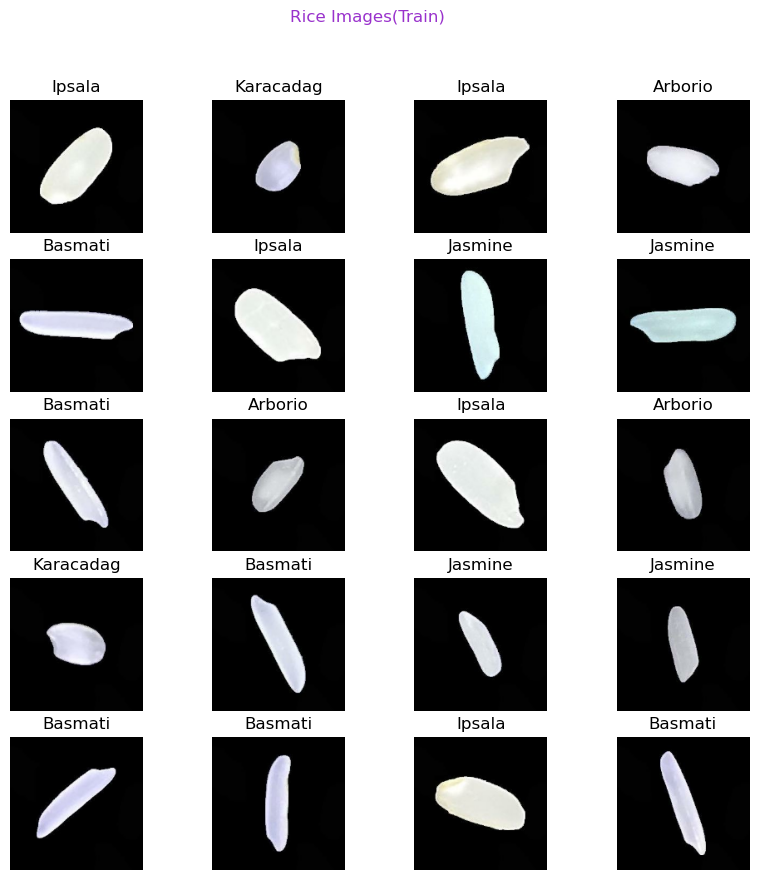

In [10]:
# visualize the Train to verify is in the correct format

plt.figure(figsize=(10, 10))
for images, labels in Train.take(1):
  for i in range(20):
    ax = plt.subplot(5, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint32"))
    plt.title(class_names[labels[i]])
    plt.axis("off")
    plt.suptitle('Rice Images(Train)', y=0.97, color='darkorchid')
plt.show()

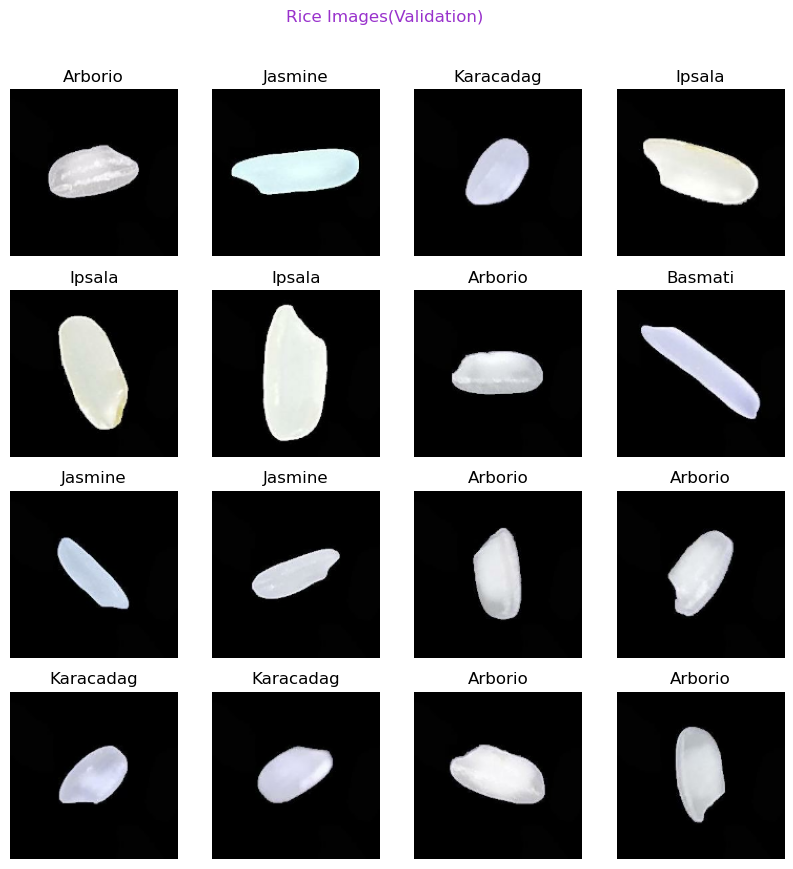

In [11]:
# visualize the Validation to verify is in the correct format

plt.figure(figsize=(10, 10))
for images, labels in Validation.take(1):
  for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint16"))
    plt.title(class_names[labels[i]])
    plt.axis("off")
    plt.suptitle('Rice Images(Validation)', y=0.96, color='darkorchid')
plt.show()

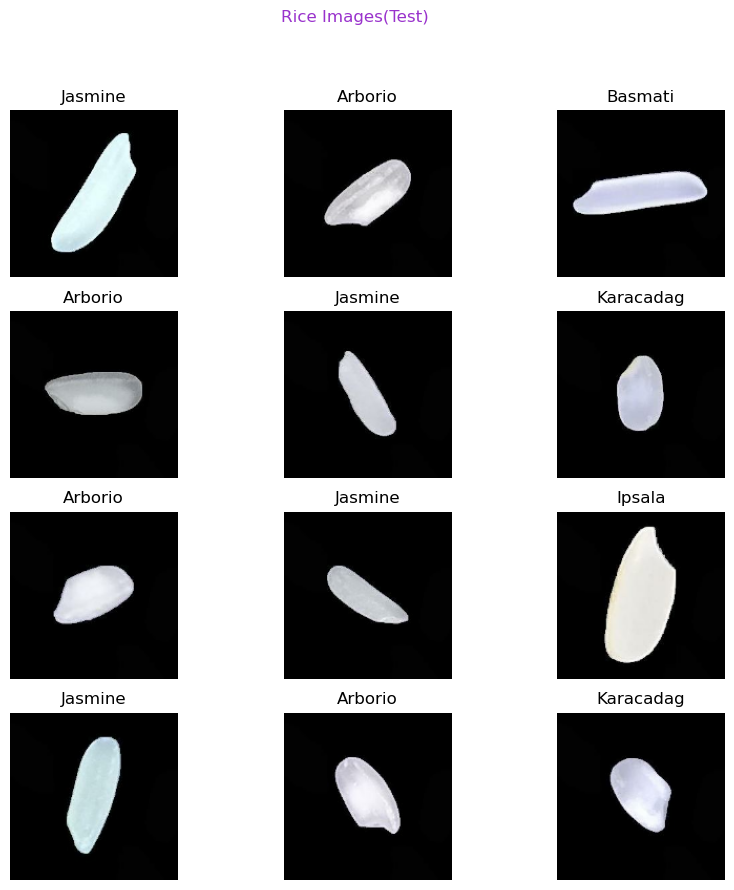

In [12]:
# visualize the Test to verify is in the correct format

plt.figure(figsize=(10, 10))
for images, labels in Test.take(1):
  for i in range(12):
    ax = plt.subplot(4, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")
    plt.suptitle('Rice Images(Test)', y=0.98, color='darkorchid')
plt.show()

<p style="background-color:black; font-family:calibri; color:yellow; font-size:300%; text-align:center;padding:20px; border-radius:30px 30px;">3. The Third Step | Building different CNN architectures</p>


# <p style="background-color:black; font-family:calibri; color:yellow; font-size:170%; text-align:center; border-radius:30px 30px;">3-1. The first architecture</p>

In [13]:
# Creat CNN
CNN1 = tf.keras.models.Sequential()

In [14]:
# Convelotion Operation 
CNN1.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3,activation='relu', input_shape=(160,160,3)))

In [15]:
# Pooling 
CNN1.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))

In [16]:
# Flattening
CNN1.add(tf.keras.layers.Flatten())

In [17]:
# Full Connection
CNN1.add(tf.keras.layers.Dense(units=320, activation='relu'))

In [18]:
# Output layers
CNN1.add(tf.keras.layers.Dense(units=5, activation='sigmoid'))

In [19]:
# Training the CNN (set compiler method)
CNN1.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])


In [20]:
# Training the CNN (fit train and validation)

Model1 = CNN1.fit(x=Train, validation_data= Validation, epochs=10)

Epoch 1/10
2625/2625 [==============================] - 87s 28ms/step - loss: 9.1149 - accuracy: 0.9479 - val_loss: 0.0951 - val_accuracy: 0.9741
Epoch 2/10
2625/2625 [==============================] - 81s 31ms/step - loss: 0.0454 - accuracy: 0.9858 - val_loss: 0.0771 - val_accuracy: 0.9791
Epoch 3/10
2625/2625 [==============================] - 71s 27ms/step - loss: 0.0323 - accuracy: 0.9893 - val_loss: 0.0784 - val_accuracy: 0.9806
Epoch 4/10
2625/2625 [==============================] - 82s 31ms/step - loss: 0.0418 - accuracy: 0.9872 - val_loss: 0.0785 - val_accuracy: 0.9793
Epoch 5/10
2625/2625 [==============================] - 71s 27ms/step - loss: 0.0239 - accuracy: 0.9922 - val_loss: 0.1428 - val_accuracy: 0.9737
Epoch 6/10
2625/2625 [==============================] - 71s 27ms/step - loss: 0.0138 - accuracy: 0.9958 - val_loss: 0.1565 - val_accuracy: 0.9802
Epoch 7/10
2625/2625 [==============================] - 82s 31ms/step - loss: 0.0219 - accuracy: 0.9954 - val_loss: 0.1396 -

In [21]:
# get summary
CNN1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 158, 158, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 79, 79, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 199712)            0         
                                                                 
 dense (Dense)               (None, 320)               63908160  
                                                                 
 dense_1 (Dense)             (None, 5)                 1605      
                                                                 
Total params: 63,910,661
Trainable params: 63,910,661
Non-trainable params: 0
____________________________________________

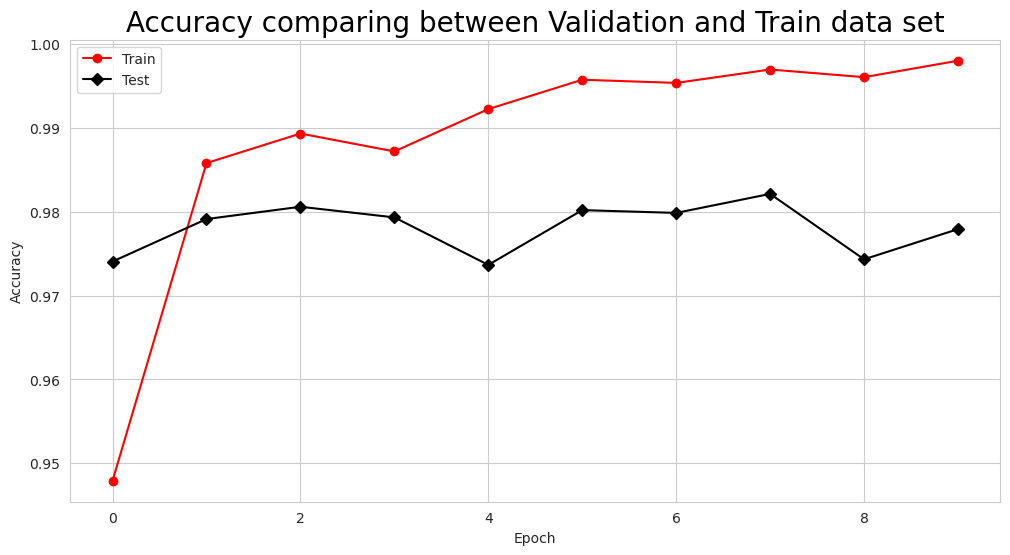

In [22]:
plt.figure(figsize=(12,6))
sb.set_style('whitegrid')
plt.plot(Model1.history['accuracy'], color='red', marker="o")
plt.plot(Model1.history['val_accuracy'],color='black', marker="D")
plt.title('Accuracy comparing between Validation and Train data set', fontsize=20, color='black')
plt.xlabel("Epoch")
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

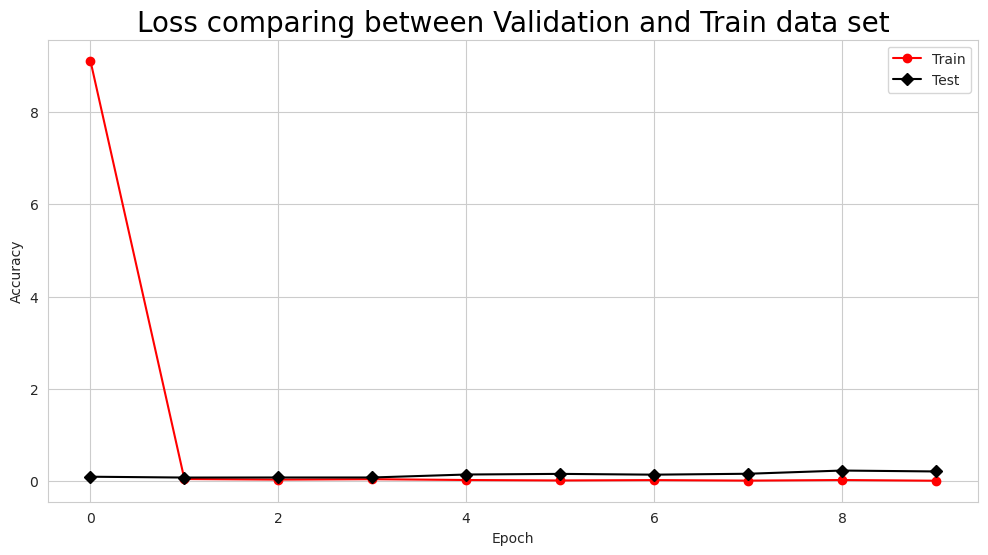

In [23]:
plt.figure(figsize=(12,6))
sb.set_style('whitegrid')
plt.plot(Model1.history['loss'], color='red', marker="o")
plt.plot(Model1.history['val_loss'],color='black', marker="D")
plt.title('Loss comparing between Validation and Train data set', fontsize=20, color='black')
plt.xlabel("Epoch")
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

In [24]:
# create a function to draw a confusion matrix
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function plots the confusion matrix.
        cm(array): confusion matrix
        classes(dictionary): classes of our target (key=categorical type, value=numerical type)
    """
    plt.figure(figsize=(10,7))
    plt.grid(False)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))

    plt.xticks(tick_marks, [f"{value}={key}" for key , value in classes.items()], rotation=45)
    plt.yticks(tick_marks, [f"{value}={key}" for key , value in classes.items()])

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i,j]}\n{cm[i,j]/np.sum(cm)*100:.2f}%",
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.tight_layout()
    plt.show()

In [25]:
# get ground truth labels and predictions to use in plot_confusion_matrix
def get_ture_and_pred_labels(dataset, model):
    """
    Get out 2 list include y_true and y_pred for use in confusion_matrix
        dataset: dataset include images and label
        model: created model
    """
    
    y_true = []
    y_pred = []
    
    for images, labels in dataset:
        labels = labels.numpy()
        outputs = tf.nn.softmax(model(images))
        pred = tf.argmax(outputs, axis=1).numpy()
        images = images.numpy()
        
        y_true = np.append(y_true, labels)
        y_pred = np.append(y_pred, pred)
    
    return y_true, y_pred

              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95      3000
         1.0       0.96      0.99      0.97      3000
         2.0       1.00      0.98      0.99      3000
         3.0       0.98      0.94      0.96      3000
         4.0       0.98      0.96      0.97      3000

    accuracy                           0.97     15000
   macro avg       0.97      0.97      0.97     15000
weighted avg       0.97      0.97      0.97     15000
 




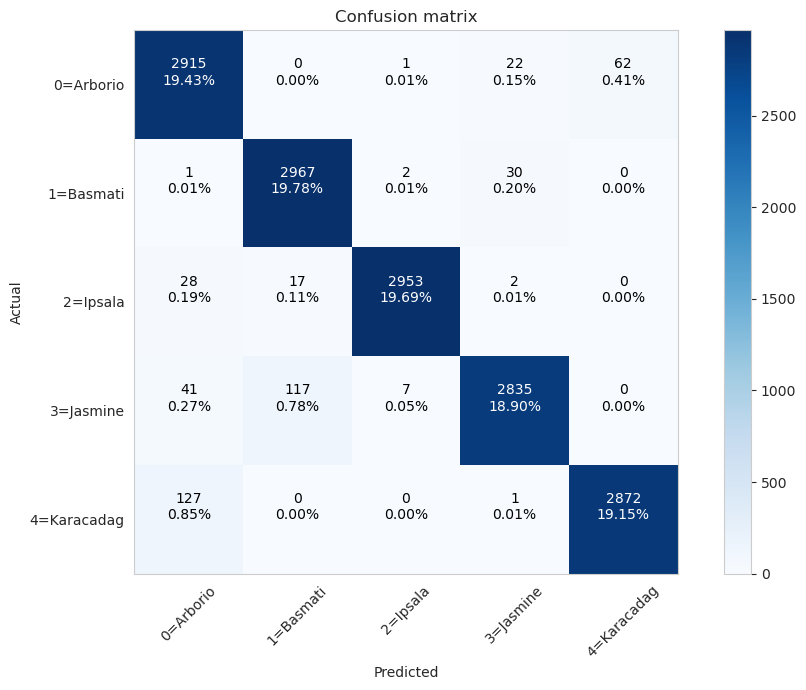

In [26]:
# plot confusion matrix for error analysis
y_true_val, y_pred_val = get_ture_and_pred_labels(Validation, CNN1)

print(classification_report(y_true_val, y_pred_val), '\n\n')
cm = confusion_matrix(y_true_val, y_pred_val)

classes = {
    "Arborio":0,
    "Basmati":1,
    "Ipsala":2,
    "Jasmine":3,
    "Karacadag":4,
}

plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

<a id="import"></a>
# <p style="background-color:black; font-family:calibri; color:yellow; font-size:170%; text-align:center; border-radius:30px 30px;">3-2. The second architecture</p>

In [27]:
# Creat CNN
CNN2 = tf.keras.models.Sequential()

In [28]:
# Convelotion Operation 1
CNN2.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3,activation='relu', input_shape=(160,160,3)))

In [29]:
# Pooling 1
CNN2.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))


In [30]:
# Convelotion Operation 2
CNN2.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3,activation='relu', input_shape=(160,160,3)))

In [31]:
# Pooling 2
CNN2.add(tf.keras.layers.MaxPooling2D(pool_size=3, strides=2))


In [32]:
# Flattening
CNN2.add(tf.keras.layers.Flatten())

In [33]:
# Full Connection
CNN2.add(tf.keras.layers.Dense(units=320, activation='relu'))

In [34]:
# Output layers
CNN2.add(tf.keras.layers.Dense(units=5, activation='sigmoid'))

In [35]:
# Training the CNN (set compiler method)
CNN2.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])


In [36]:
# Training the CNN (fit train and validation)
Model2 = CNN2.fit(x=Train, validation_data= Validation, epochs=10)

Epoch 1/10
2625/2625 [==============================] - 62s 23ms/step - loss: 0.9760 - accuracy: 0.9574 - val_loss: 0.0628 - val_accuracy: 0.9803
Epoch 2/10
2625/2625 [==============================] - 59s 23ms/step - loss: 0.0635 - accuracy: 0.9801 - val_loss: 0.0541 - val_accuracy: 0.9831
Epoch 3/10
2625/2625 [==============================] - 59s 22ms/step - loss: 0.0438 - accuracy: 0.9858 - val_loss: 0.0776 - val_accuracy: 0.9791
Epoch 4/10
2625/2625 [==============================] - 59s 23ms/step - loss: 0.0395 - accuracy: 0.9884 - val_loss: 0.0720 - val_accuracy: 0.9842
Epoch 5/10
2625/2625 [==============================] - 59s 22ms/step - loss: 0.0319 - accuracy: 0.9908 - val_loss: 0.0868 - val_accuracy: 0.9819
Epoch 6/10
2625/2625 [==============================] - 60s 23ms/step - loss: 0.0222 - accuracy: 0.9934 - val_loss: 0.0890 - val_accuracy: 0.9819
Epoch 7/10
2625/2625 [==============================] - 62s 23ms/step - loss: 0.0173 - accuracy: 0.9949 - val_loss: 0.1199 -

In [37]:
# get summary
CNN2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 158, 158, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 79, 79, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 77, 77, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 38, 38, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 46208)             0         
                                                                 
 dense_2 (Dense)             (None, 320)              

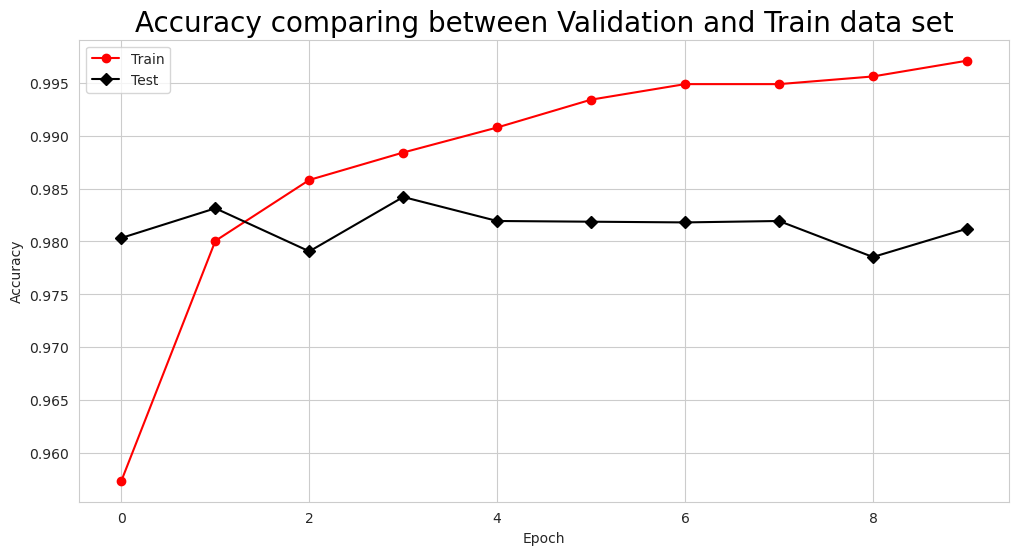

In [38]:
# plot accuracy for train and validation
plt.figure(figsize=(12,6))
sb.set_style('whitegrid')
plt.plot(Model2.history['accuracy'], color='red', marker="o")
plt.plot(Model2.history['val_accuracy'],color='black', marker="D")
plt.title('Accuracy comparing between Validation and Train data set', fontsize=20, color='black')
plt.xlabel("Epoch")
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

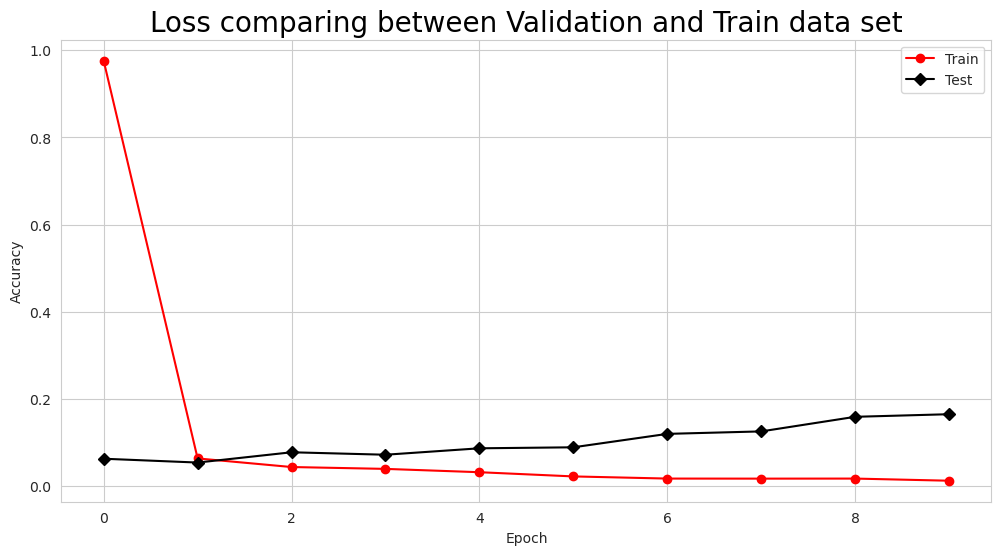

In [39]:
# plot loss for train and validation
plt.figure(figsize=(12,6))
sb.set_style('whitegrid')
plt.plot(Model2.history['loss'], color='red', marker="o")
plt.plot(Model2.history['val_loss'],color='black', marker="D")
plt.title('Loss comparing between Validation and Train data set', fontsize=20, color='black')
plt.xlabel("Epoch")
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96      3000
         1.0       0.99      0.99      0.99      3000
         2.0       1.00      1.00      1.00      3000
         3.0       0.98      0.98      0.98      3000
         4.0       0.97      0.97      0.97      3000

    accuracy                           0.98     15000
   macro avg       0.98      0.98      0.98     15000
weighted avg       0.98      0.98      0.98     15000
 




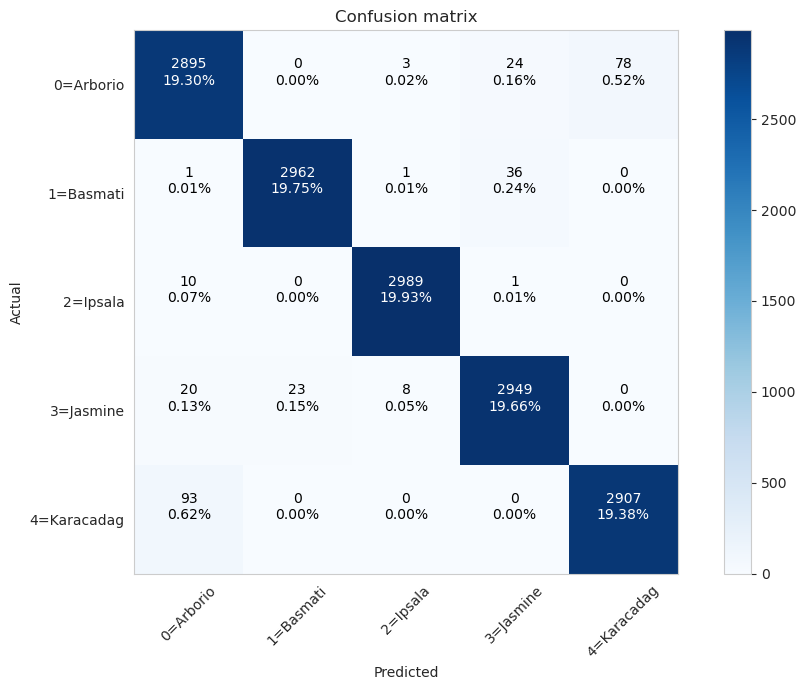

In [40]:
# plot confusion matrix for error analysis
y_true_val, y_pred_val = get_ture_and_pred_labels(Validation, CNN2)

print(classification_report(y_true_val, y_pred_val), '\n\n')
cm = confusion_matrix(y_true_val, y_pred_val)

classes = {
    "Arborio":0,
    "Basmati":1,
    "Ipsala":2,
    "Jasmine":3,
    "Karacadag":4,
}

plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

<a id="import"></a>
# <p style="background-color:black; font-family:calibri; color:yellow; font-size:170%; text-align:center; border-radius:30px 30px;">3-3. The third architecture</p>

In [41]:
# Creat CNN
CNN3 = tf.keras.models.Sequential()

In [42]:
# Convelotion Operation 1
CNN3.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3,activation='relu', input_shape=(160,160,3)))

In [43]:
# Convelotion Operation 2
CNN3.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3,activation='relu', input_shape=(160,160,3)))

In [44]:
# Pooling
CNN3.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))


In [45]:
# Flattening
CNN3.add(tf.keras.layers.Flatten())

In [46]:
# Full Connection 1
CNN3.add(tf.keras.layers.Dense(units=320, activation='relu'))

In [47]:
# Full Connection 2
CNN3.add(tf.keras.layers.Dense(units=320, activation='relu'))

In [48]:
# Output layers
CNN3.add(tf.keras.layers.Dense(units=5, activation='sigmoid'))

In [49]:
# Training the CNN (set compiler method)
CNN3.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])


In [50]:
# Training the CNN (fit train and validation)
Model3 = CNN3.fit(x=Train, validation_data= Validation, epochs=6)

Epoch 1/6
2625/2625 [==============================] - 101s 37ms/step - loss: 3.6302 - accuracy: 0.9533 - val_loss: 0.0703 - val_accuracy: 0.9776
Epoch 2/6
2625/2625 [==============================] - 98s 37ms/step - loss: 0.0464 - accuracy: 0.9852 - val_loss: 0.1232 - val_accuracy: 0.9693
Epoch 3/6
2625/2625 [==============================] - 99s 37ms/step - loss: 0.0398 - accuracy: 0.9882 - val_loss: 0.1642 - val_accuracy: 0.9696
Epoch 4/6
2625/2625 [==============================] - 98s 37ms/step - loss: 0.0321 - accuracy: 0.9902 - val_loss: 0.1150 - val_accuracy: 0.9805
Epoch 5/6
2625/2625 [==============================] - 98s 37ms/step - loss: 0.0221 - accuracy: 0.9939 - val_loss: 0.2036 - val_accuracy: 0.9616
Epoch 6/6
2625/2625 [==============================] - 98s 37ms/step - loss: 0.0223 - accuracy: 0.9943 - val_loss: 0.1823 - val_accuracy: 0.9768


In [51]:
CNN3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 158, 158, 32)      896       
                                                                 
 conv2d_4 (Conv2D)           (None, 156, 156, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 78, 78, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 194688)            0         
                                                                 
 dense_4 (Dense)             (None, 320)               62300480  
                                                                 
 dense_5 (Dense)             (None, 320)               102720    
                                                      

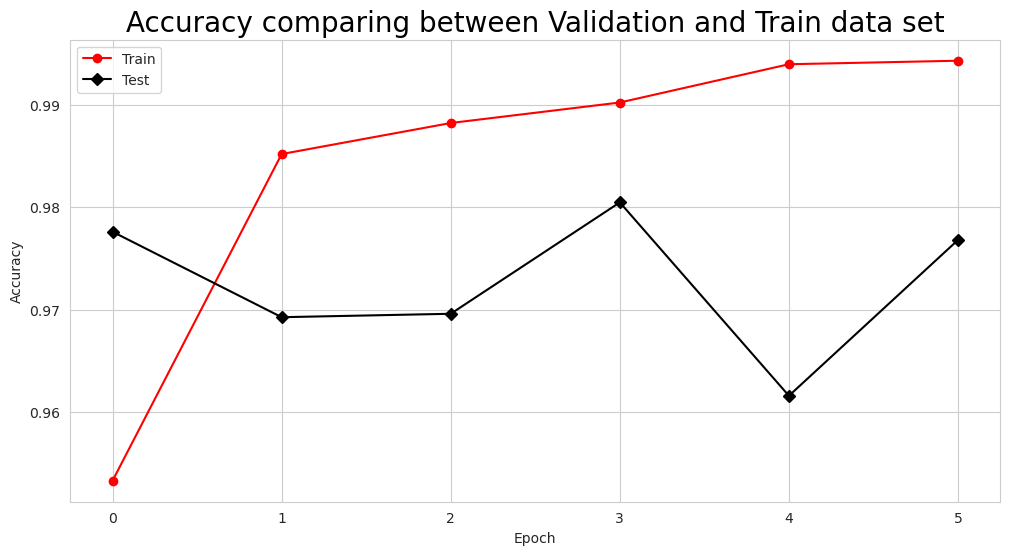

In [52]:
# plot accuracy for train and validation
plt.figure(figsize=(12,6))
sb.set_style('whitegrid')
plt.plot(Model3.history['accuracy'], color='red', marker="o")
plt.plot(Model3.history['val_accuracy'],color='black', marker="D")
plt.title('Accuracy comparing between Validation and Train data set', fontsize=20, color='black')
plt.xlabel("Epoch")
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

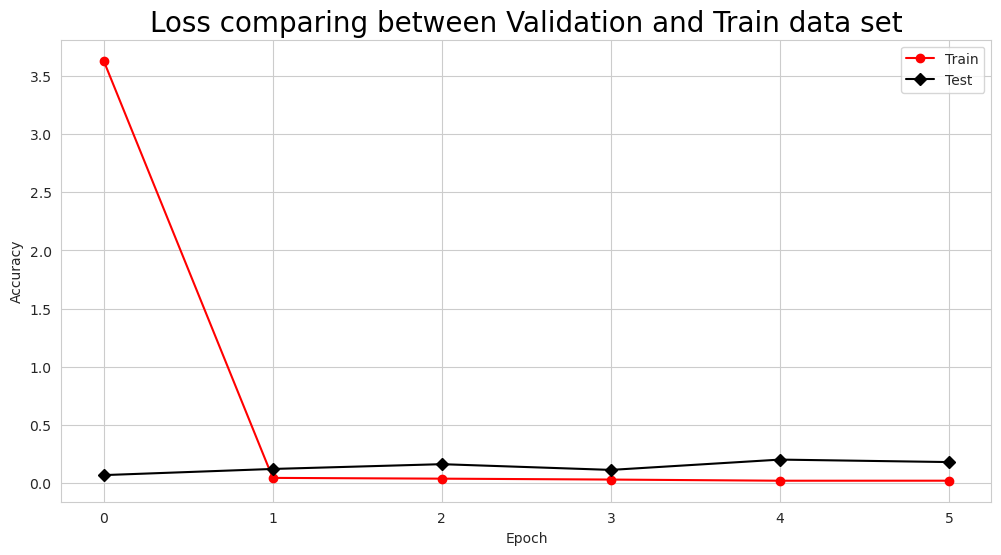

In [53]:
# plot loss for train and validation
plt.figure(figsize=(12,6))
sb.set_style('whitegrid')
plt.plot(Model3.history['loss'], color='red', marker="o")
plt.plot(Model3.history['val_loss'],color='black', marker="D")
plt.title('Loss comparing between Validation and Train data set', fontsize=20, color='black')
plt.xlabel("Epoch")
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96      3000
         1.0       0.98      0.98      0.98      3000
         2.0       1.00      0.99      0.99      3000
         3.0       0.98      0.96      0.97      3000
         4.0       0.98      0.96      0.97      3000

    accuracy                           0.98     15000
   macro avg       0.98      0.98      0.98     15000
weighted avg       0.98      0.98      0.98     15000
 




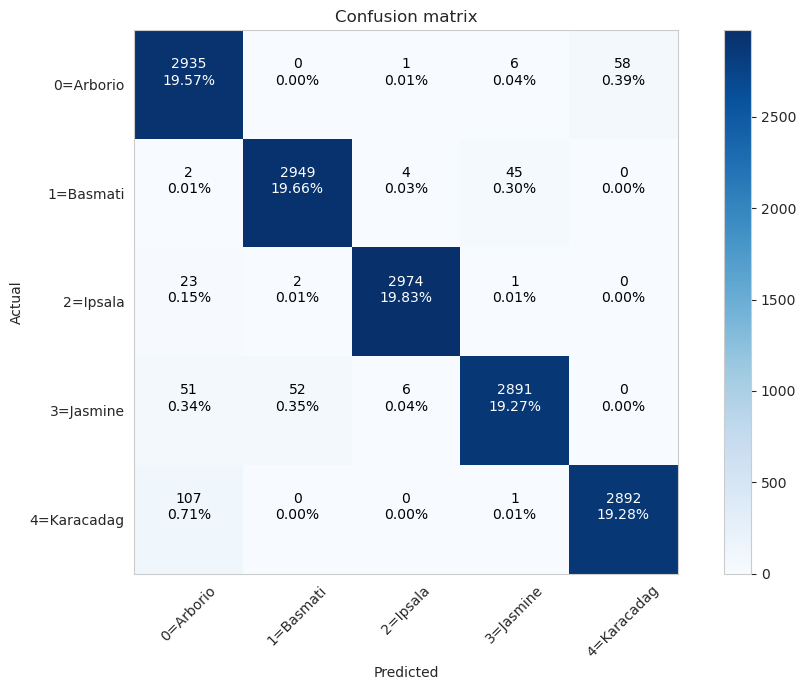

In [54]:
# plot confusion matrix for error analysis
y_true_val, y_pred_val = get_ture_and_pred_labels(Validation, CNN3)

print(classification_report(y_true_val, y_pred_val), '\n\n')
cm = confusion_matrix(y_true_val, y_pred_val)

classes = {
    "Arborio":0,
    "Basmati":1,
    "Ipsala":2,
    "Jasmine":3,
    "Karacadag":4,
}

plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

<a id="import"></a>
# <p style="background-color:black; font-family:calibri; color:yellow; font-size:170%; text-align:center; border-radius:30px 30px;">3-4. The fourth architecture</p>

In [55]:
# Creat CNN
CNN4 = tf.keras.models.Sequential()


In [56]:
# Convelotion Operation
CNN4.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3,activation='relu', input_shape=(160,160,3)))

In [57]:
# Pooling 1
CNN4.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))


In [58]:
# Pooling 2
CNN4.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))


In [59]:
# Flattening
CNN4.add(tf.keras.layers.Flatten())

In [60]:
# Full Connection 1
CNN4.add(tf.keras.layers.Dense(units=320, activation='relu'))

In [61]:
# Full Connection 2
CNN3.add(tf.keras.layers.Dense(units=320, activation='relu'))

In [62]:
# Output layers
CNN4.add(tf.keras.layers.Dense(units=5, activation='sigmoid'))

In [63]:
# Training the CNN (set compiler method)
CNN4.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])


In [64]:
# Training the CNN (fit train and validation)
Model4 = CNN4.fit(x=Train, validation_data= Validation, epochs=20)

Epoch 1/20
2625/2625 [==============================] - 57s 21ms/step - loss: 3.8136 - accuracy: 0.9482 - val_loss: 0.0752 - val_accuracy: 0.9752
Epoch 2/20
2625/2625 [==============================] - 57s 22ms/step - loss: 0.0558 - accuracy: 0.9820 - val_loss: 0.0482 - val_accuracy: 0.9853
Epoch 3/20
2625/2625 [==============================] - 67s 25ms/step - loss: 0.0401 - accuracy: 0.9864 - val_loss: 0.0593 - val_accuracy: 0.9810
Epoch 4/20
2625/2625 [==============================] - 56s 21ms/step - loss: 0.0354 - accuracy: 0.9879 - val_loss: 0.0744 - val_accuracy: 0.9810
Epoch 5/20
2625/2625 [==============================] - 57s 22ms/step - loss: 0.0325 - accuracy: 0.9898 - val_loss: 0.0734 - val_accuracy: 0.9815
Epoch 6/20
2625/2625 [==============================] - 57s 22ms/step - loss: 0.0189 - accuracy: 0.9941 - val_loss: 0.0979 - val_accuracy: 0.9811
Epoch 7/20
2625/2625 [==============================] - 57s 22ms/step - loss: 0.0151 - accuracy: 0.9952 - val_loss: 0.1085 -

In [65]:
# get summary
CNN4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 158, 158, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 79, 79, 32)       0         
 2D)                                                             
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 39, 39, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 48672)             0         
                                                                 
 dense_7 (Dense)             (None, 320)               15575360  
                                                                 
 dense_9 (Dense)             (None, 5)                

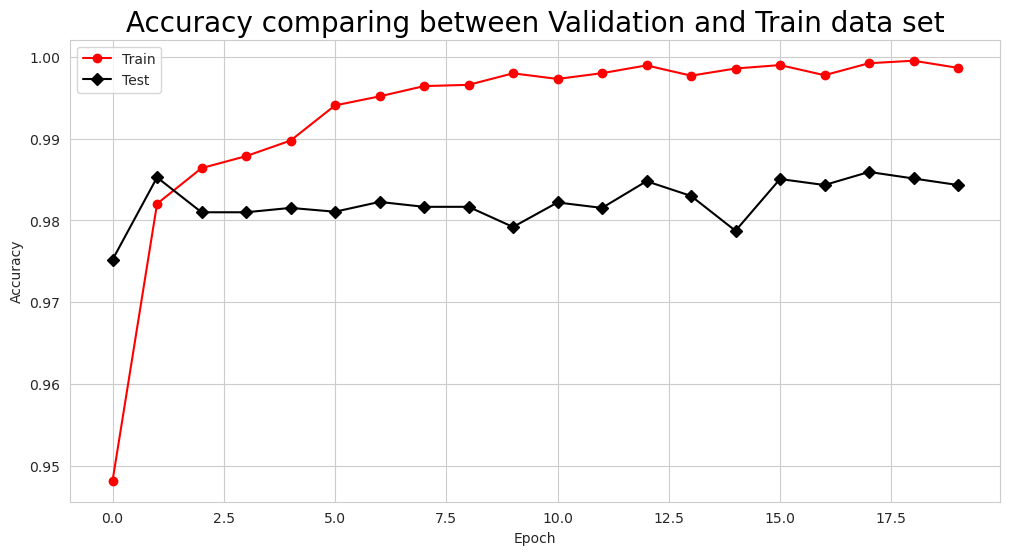

In [66]:
# plot accuracy for train and validation 
plt.figure(figsize=(12,6))
sb.set_style('whitegrid')
plt.plot(Model4.history['accuracy'], color='red', marker="o")
plt.plot(Model4.history['val_accuracy'],color='black', marker="D")
plt.title('Accuracy comparing between Validation and Train data set', fontsize=20, color='black')
plt.xlabel("Epoch")
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

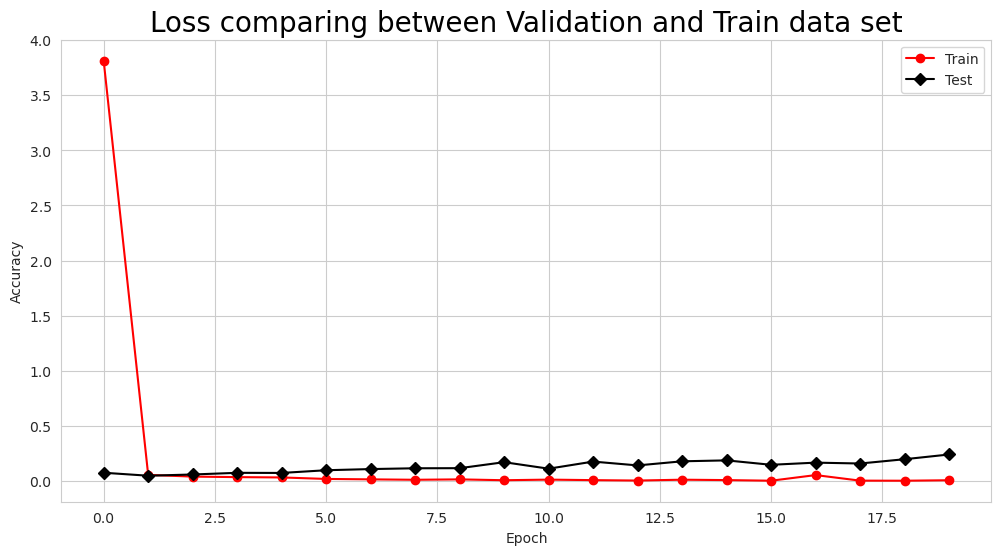

In [67]:
# plot loss for train and validation
plt.figure(figsize=(12,6))
sb.set_style('whitegrid')
plt.plot(Model4.history['loss'], color='red', marker="o")
plt.plot(Model4.history['val_loss'],color='black', marker="D")
plt.title('Loss comparing between Validation and Train data set', fontsize=20, color='black')
plt.xlabel("Epoch")
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

              precision    recall  f1-score   support

         0.0       0.99      0.96      0.97      3000
         1.0       0.98      0.99      0.98      3000
         2.0       1.00      1.00      1.00      3000
         3.0       0.98      0.98      0.98      3000
         4.0       0.96      0.99      0.98      3000

    accuracy                           0.98     15000
   macro avg       0.98      0.98      0.98     15000
weighted avg       0.98      0.98      0.98     15000
 




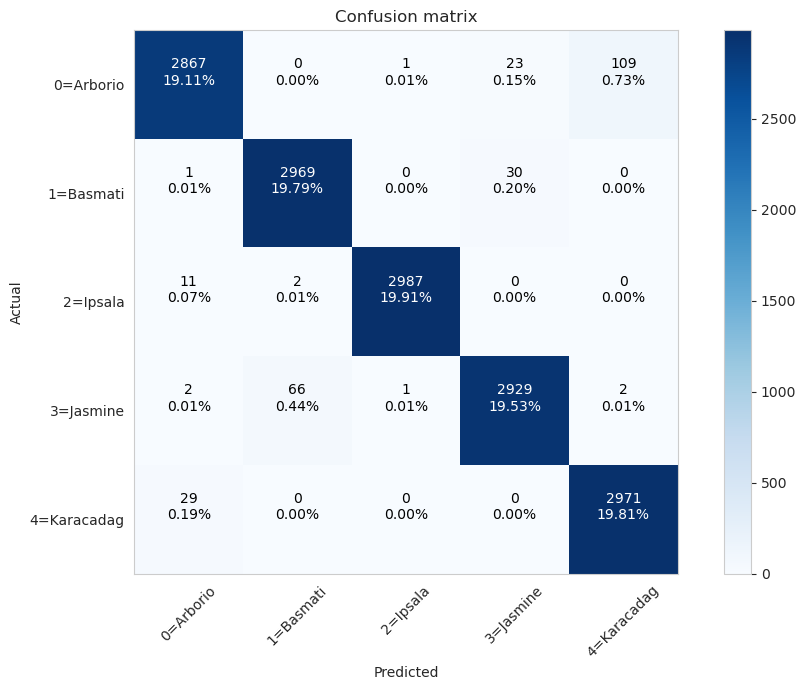

In [68]:
# plot confusion matrix for error analysis
y_true_val, y_pred_val = get_ture_and_pred_labels(Validation, CNN4)

print(classification_report(y_true_val, y_pred_val), '\n\n')
cm = confusion_matrix(y_true_val, y_pred_val)

classes = {
    "Arborio":0,
    "Basmati":1,
    "Ipsala":2,
    "Jasmine":3,
    "Karacadag":4,
}

plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

<a id="import"></a>
# <p style="background-color:black; font-family:calibri; color:yellow; font-size:170%; text-align:center; border-radius:30px 30px;">3-5. The fifth architecture
</p>

In [69]:
# Creat CNN
CNN5 = tf.keras.models.Sequential()

In [70]:
# Convelotion Operation 1
CNN5.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3,activation='relu', input_shape=(160,160,3)))

In [71]:
# Convelotion Operation 2
CNN5.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3,activation='relu', input_shape=(160,160,3)))

In [72]:
# Pooling 1
CNN5.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))


In [73]:
# Pooling 2
CNN5.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))


In [74]:
# Pooling 3
CNN5.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))


In [75]:
# Flattening
CNN5.add(tf.keras.layers.Flatten())

In [76]:
# Full Connection 
CNN5.add(tf.keras.layers.Dense(units=320, activation='relu'))

In [77]:
# Output layers
CNN5.add(tf.keras.layers.Dense(units=5, activation='sigmoid'))

In [78]:
# Training the CNN (set compiler method)
CNN5.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])


In [79]:
# Training the CNN (fit train and validation)
Model5 = CNN5.fit(x=Train, validation_data= Validation, epochs=27)

Epoch 1/27
2625/2625 [==============================] - 68s 25ms/step - loss: 0.7932 - accuracy: 0.9583 - val_loss: 0.0622 - val_accuracy: 0.9801
Epoch 2/27
2625/2625 [==============================] - 68s 26ms/step - loss: 0.0557 - accuracy: 0.9812 - val_loss: 0.0786 - val_accuracy: 0.9757
Epoch 3/27
2625/2625 [==============================] - 68s 26ms/step - loss: 0.0422 - accuracy: 0.9859 - val_loss: 0.0795 - val_accuracy: 0.9784
Epoch 4/27
2625/2625 [==============================] - 68s 26ms/step - loss: 0.0395 - accuracy: 0.9870 - val_loss: 0.0528 - val_accuracy: 0.9859
Epoch 5/27
2625/2625 [==============================] - 68s 26ms/step - loss: 0.0272 - accuracy: 0.9911 - val_loss: 0.0748 - val_accuracy: 0.9815
Epoch 6/27
2625/2625 [==============================] - 68s 26ms/step - loss: 0.0222 - accuracy: 0.9924 - val_loss: 0.0526 - val_accuracy: 0.9879
Epoch 7/27
2625/2625 [==============================] - 68s 26ms/step - loss: 0.0196 - accuracy: 0.9937 - val_loss: 0.0697 -

In [80]:
# get summary
CNN5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 158, 158, 32)      896       
                                                                 
 conv2d_7 (Conv2D)           (None, 156, 156, 32)      9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 78, 78, 32)       0         
 2D)                                                             
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 39, 39, 32)       0         
 2D)                                                             
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 19, 19, 32)       0         
 2D)                                                             
                                                      

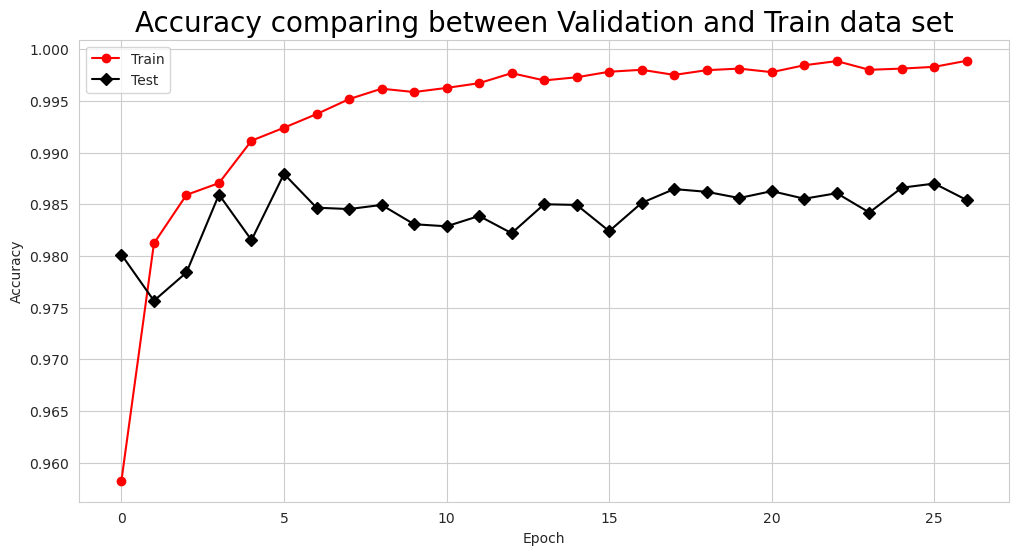

In [81]:
# plot accuracy for train and validation
plt.figure(figsize=(12,6))
sb.set_style('whitegrid')
plt.plot(Model5.history['accuracy'], color='red', marker="o")
plt.plot(Model5.history['val_accuracy'],color='black', marker="D")
plt.title('Accuracy comparing between Validation and Train data set', fontsize=20, color='black')
plt.xlabel("Epoch")
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

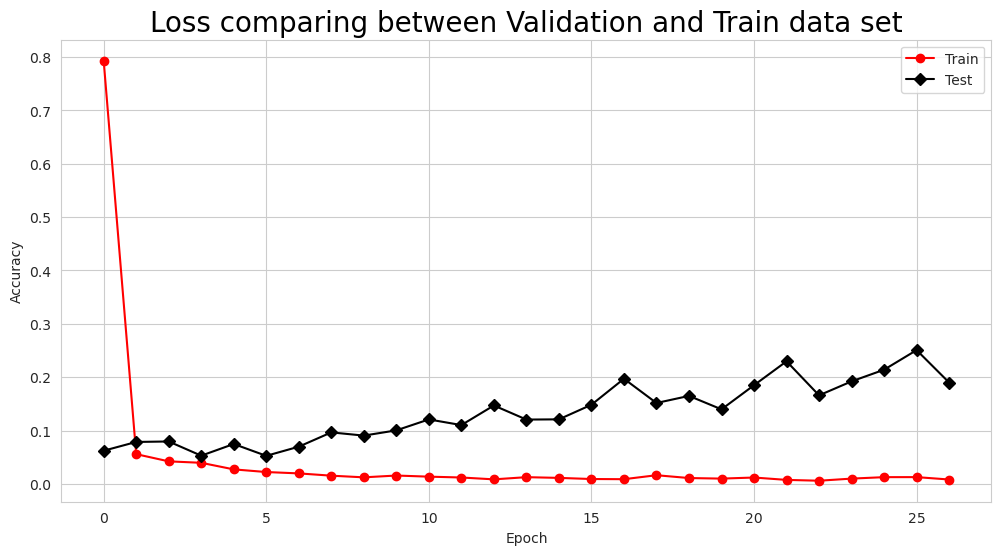

In [82]:
# plot loss for train and validation
plt.figure(figsize=(12,6))
sb.set_style('whitegrid')
plt.plot(Model5.history['loss'], color='red', marker="o")
plt.plot(Model5.history['val_loss'],color='black', marker="D")
plt.title('Loss comparing between Validation and Train data set', fontsize=20, color='black')
plt.xlabel("Epoch")
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97      3000
         1.0       0.99      0.99      0.99      3000
         2.0       1.00      1.00      1.00      3000
         3.0       0.99      0.99      0.99      3000
         4.0       0.98      0.98      0.98      3000

    accuracy                           0.99     15000
   macro avg       0.99      0.99      0.99     15000
weighted avg       0.99      0.99      0.99     15000
 




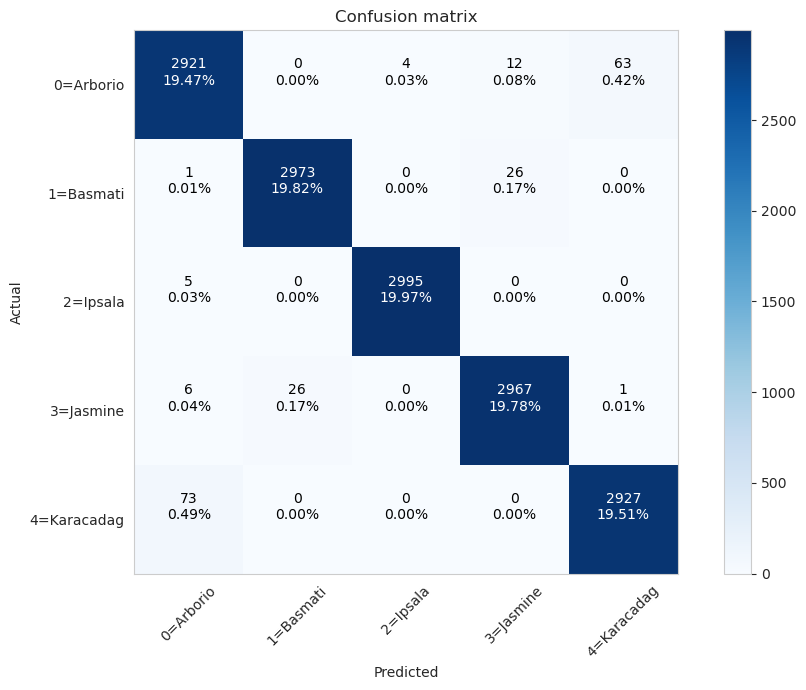

In [83]:
# plot confusion matrix for error analysis
y_true_val, y_pred_val = get_ture_and_pred_labels(Validation, CNN5)

print(classification_report(y_true_val, y_pred_val), '\n\n')
cm = confusion_matrix(y_true_val, y_pred_val)

classes = {
    "Arborio":0,
    "Basmati":1,
    "Ipsala":2,
    "Jasmine":3,
    "Karacadag":4,
}

plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

# <p style="background-color:black; font-family:calibri; color:yellow; font-size:170%; text-align:center; border-radius:30px 30px;">4. The fourth Step | Select Best Model </p>
 

In [84]:
# Save file(HDF5 format)
CNN4.save('Best_architecture1.h5')

In [85]:
# Save file(HDF5 format)
CNN5.save('Best_architecture2.h5')

In [86]:
# select best model
# Recreate the exact same model, including its weights and the optimizer
Best_model = tf.keras.models.load_model('Best_architecture2.h5')



# <p style="background-color:black; font-family:calibri; color:yellow; font-size:170%; text-align:center; border-radius:30px 30px;">5. The fifth Step | Visualize Result of State_of_the_Art architecture </p>
 

In [87]:
for images, labels in Test:
    test_labels = labels
    predictions = tf.nn.softmax(Best_model(images))
    test_images = images
    break

In [88]:
# check prediction
print(f"Predicted Logits for First Image: {predictions[0]}")
print(f"Predicted Label for First Image: {np.argmax(predictions[0])}")

Predicted Logits for First Image: [0.1488478  0.14884755 0.14884755 0.14884755 0.40460956]
Predicted Label for First Image: 4


In [89]:
def plot_image(i, predictions_array, true_label, img):
    """
    For plot each image
        i (int): image number
        predictions_array (tensor): prediction for input_image
        ture_label (tensor): true label for input_image
        img (tensor): input_image
    """

    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img.numpy().astype("uint8"))
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'black'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
    

###########################################################################################


def plot_value_array(i, predictions_array, true_label):
    """
    Plot bar plot of predciton
        i (int): image number
        predictions_array (tensor): prediction array of image
        ture_label (tensor): true label for image
    """

    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(5))
    plt.yticks([])
    thisplot = plt.bar(range(5), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('black')
    
    

###########################################################################################



def plot_final_result(predictions_array, test_labels, test_images, num_rows=10, num_cols=3):
    """
    Plot the first X test images, their predicted labels, and the true labels.
        predictions_array(): all predictions for all test_image
        test_labels(): all true label for all test_image
        test_images(): all test_image
    """
    
    num_images = num_rows*num_cols
    plt.figure(figsize=(2*2*num_cols, 2*num_rows))

    for i in range(num_images):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(i, predictions_array[i], test_labels, test_images)
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(i, predictions_array[i], test_labels)
        
    plt.tight_layout()
    plt.show()

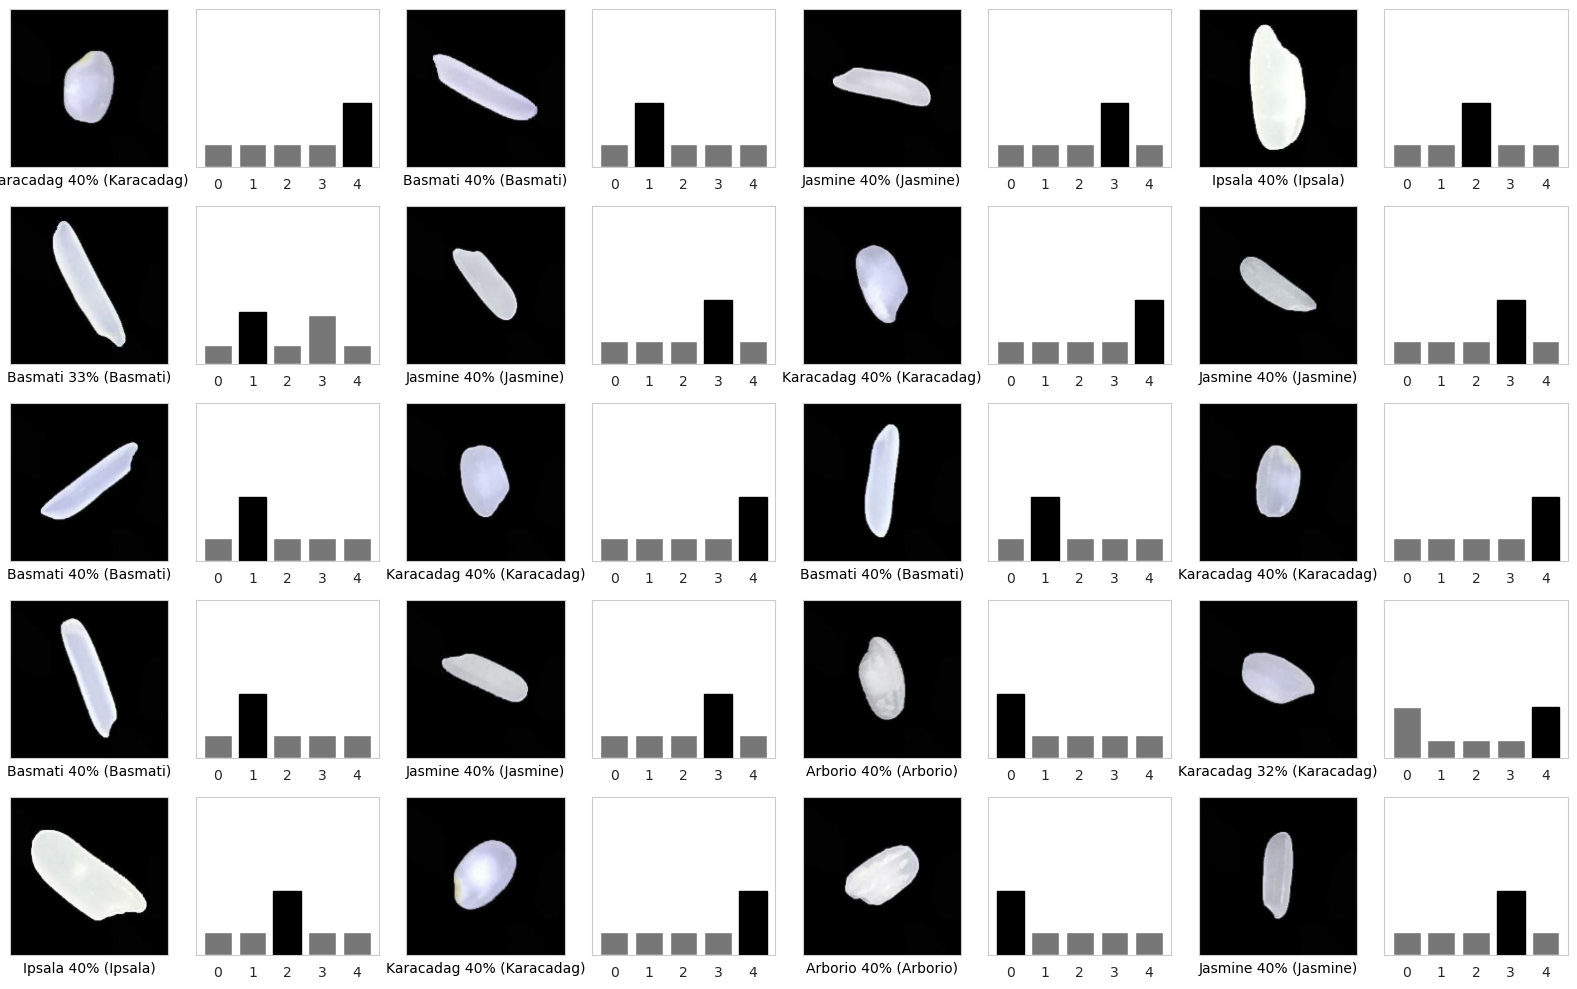

In [90]:
plot_final_result(predictions, test_labels, test_images, num_rows=5, num_cols=4)


#### </center></h1>
<center><img style="border-radius: 200px 200px 200px 200px" src=https://static.vecteezy.com/system/resources/thumbnails/024/795/537/original/loop-thank-you-for-visiting-golden-light-motion-text-free-video.jpg height=500px width=900px border-radius=45%></center><br>